In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\arund\Downloads\beer-servings (1).csv",index_col='Unnamed: 0')
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [3]:
data.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,185.000000,185.000000,187.000000,192.000000
mean,105.124324,83.221622,50.165775,4.741667
std,100.524714,89.142958,80.358868,3.767654
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,60.000000,9.000000,4.250000
75%,185.000000,132.000000,60.500000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [5]:
data.isnull().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

# IQR Method

In [6]:
data['wine_servings'] = data['wine_servings'].fillna(data['wine_servings'].median())

In [7]:
data.isnull().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   0
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

<Axes: xlabel='wine_servings', ylabel='Count'>

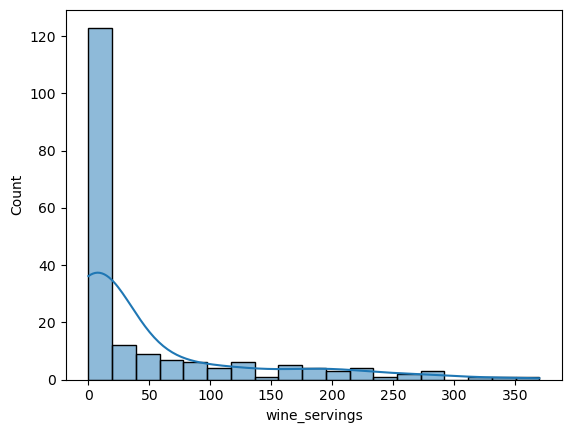

In [8]:
sns.histplot(data["wine_servings"],kde=True)

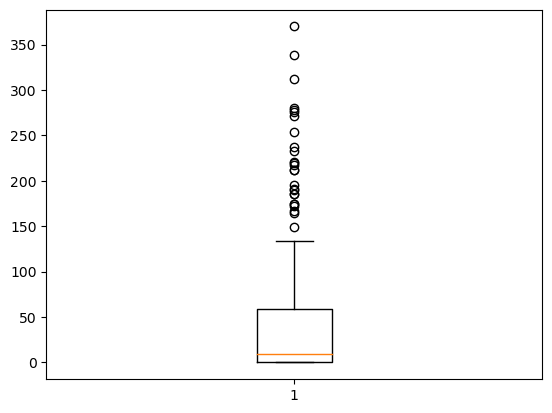

In [9]:
plt.boxplot(data['wine_servings'])
plt.show();

In [10]:
Q1 = np.percentile(data['wine_servings'],25,method='midpoint')
Q2 = np.percentile(data['wine_servings'],50,method='midpoint')
Q3 = np.percentile(data['wine_servings'],75,method='midpoint')

In [11]:
print("Q1 is ",Q1)
print("Q2 is ",Q2)
print("Q3 is ",Q3)

Q1 is  1.0
Q2 is  9.0
Q3 is  59.0


In [12]:
IQR = Q3 - Q1
IQR

58.0

In [13]:
low_lim = Q1-IQR*1.5
up_lim = Q3+1.5*IQR

print("lower limit is ",low_lim)
print("upper limit is ",up_lim)

lower limit is  -86.0
upper limit is  146.0


In [14]:
outlier=[]
for x in data['wine_servings']:
    if((x > up_lim) or (x < low_lim)):
        outlier.append(x)

outlier

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [15]:
data['wine_servings'] = data['wine_servings'].clip(lower=low_lim , upper=up_lim)

In [16]:
outlier=[]
for x in data['wine_servings']:
     if((x > up_lim) or (x < low_lim)):
        outlier.append(x)

outlier

[]

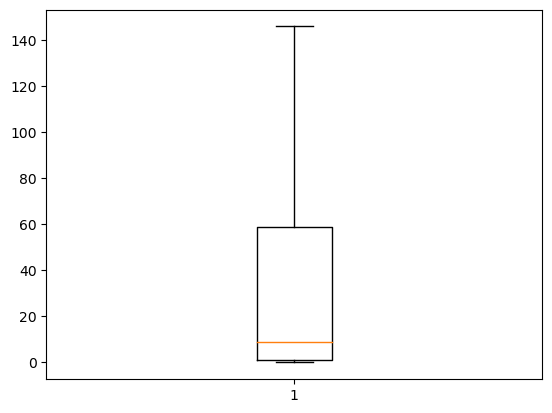

In [17]:
plt.boxplot(data['wine_servings'])
plt.show();

#  Z Score Method

In [18]:
import scipy.stats as stats

In [19]:
from scipy.stats import zscore

# 1) Spirit_servings

In [20]:
data1 = pd.read_csv(r"C:\Users\arund\Downloads\beer-servings (1).csv",index_col='Unnamed: 0')
data1.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [21]:
data1.isnull().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [22]:
data1['spirit_servings'] = data1['spirit_servings'].fillna(data1['spirit_servings'].median())

<Axes: xlabel='spirit_servings', ylabel='Count'>

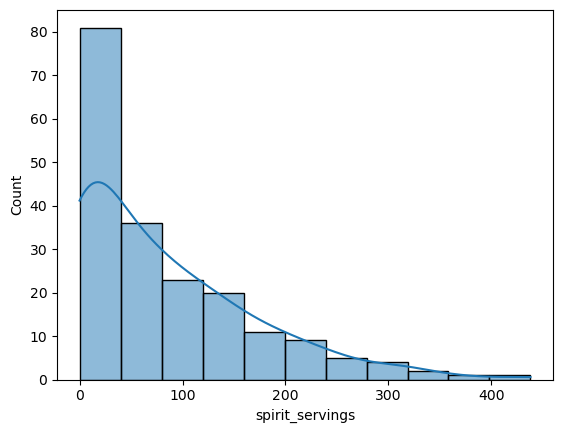

In [23]:
sns.histplot(data1["spirit_servings"],kde=True)

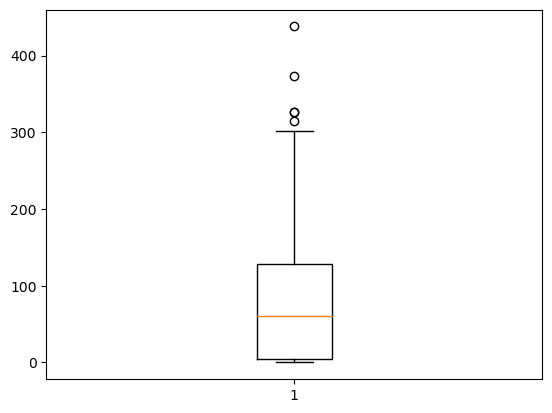

In [38]:
plt.boxplot(data1['spirit_servings'])
plt.show();

In [26]:
data1.spirit_servings.mean()

82.25906735751295

In [27]:
data1.spirit_servings.std()

87.38936596944914

In [28]:
data1['zscore'] = (data1.spirit_servings - data1.spirit_servings.mean())/data1.spirit_servings.std()

In [29]:
data1.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,zscore
0,Afghanistan,0.0,0.0,0.0,0.0,Asia,-0.941294
1,Albania,89.0,132.0,54.0,4.9,Europe,0.569187
2,Algeria,25.0,0.0,14.0,0.7,Africa,-0.941294
3,Andorra,245.0,138.0,312.0,12.4,Europe,0.637846
4,Angola,217.0,57.0,45.0,5.9,Africa,-0.289041


In [30]:
data1[data1['zscore'] > 3]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,zscore
15,Belarus,142.0,373.0,42.0,14.4,Europe,3.326960
68,Grenada,199.0,438.0,28.0,11.9,North America,4.070758


In [31]:
data1[data1['zscore'] < -3]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,zscore


In [77]:
outliers = data1[(data1['zscore'] > 3)  |  (data1['zscore']< -3)]
outliers

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,zscore
15,Belarus,142.0,373.0,42.0,14.4,Europe,3.326960
68,Grenada,199.0,438.0,28.0,11.9,North America,4.070758


In [58]:
new_data1 = data1[(data1['zscore'] < 3) & (data1['zscore'] > -3)]
new_data1.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,zscore
0,Afghanistan,0.0,0.0,0.0,0.0,Asia,-0.941294
1,Albania,89.0,132.0,54.0,4.9,Europe,0.569187
2,Algeria,25.0,0.0,14.0,0.7,Africa,-0.941294
3,Andorra,245.0,138.0,312.0,12.4,Europe,0.637846
4,Angola,217.0,57.0,45.0,5.9,Africa,-0.289041


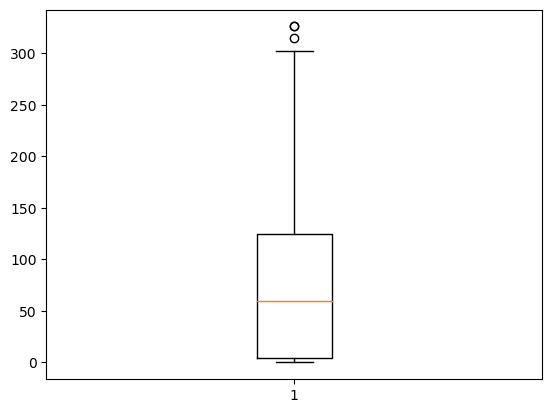

In [59]:
plt.boxplot(new_data1['spirit_servings'])
plt.show();

# 2) Wine_servings

In [39]:
data2 = pd.read_csv(r"C:\Users\arund\Downloads\beer-servings (1).csv",index_col='Unnamed: 0')
data2.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [40]:
data2.isnull().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [61]:
data2['wine_servings'] = data2['wine_servings'].fillna(data2['wine_servings'].median())
data2['spirit_servings'] = data2['spirit_servings'].fillna(data2['spirit_servings'].median())

<Axes: xlabel='wine_servings', ylabel='Count'>

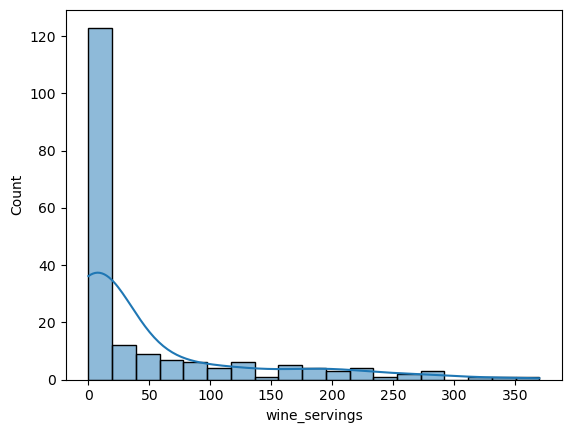

In [62]:
sns.histplot(data2["wine_servings"],kde=True)

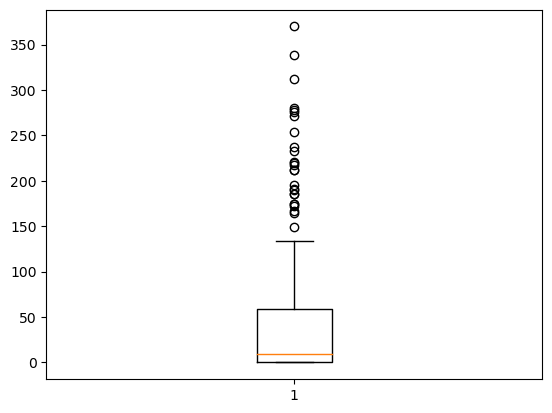

In [63]:
plt.boxplot(data2['wine_servings'])
plt.show();

In [64]:
data2.wine_servings.mean()

48.8860103626943

In [65]:
data2.wine_servings.std()

79.4169997881692

In [66]:
data2['zscore'] = (data2.wine_servings - data2.wine_servings.mean())/data2.wine_servings.std()

In [67]:
data2.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,zscore
0,Afghanistan,0.0,0.0,0.0,0.0,Asia,-0.615561
1,Albania,89.0,132.0,54.0,4.9,Europe,0.064394
2,Algeria,25.0,0.0,14.0,0.7,Africa,-0.439276
3,Andorra,245.0,138.0,312.0,12.4,Europe,3.313069
4,Angola,217.0,57.0,45.0,5.9,Africa,-0.048932


In [68]:
data2[data2['zscore'] > 3]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,zscore
3,Andorra,245.0,138.0,312.0,12.4,Europe,3.313069
61,France,127.0,151.0,370.0,11.8,Europe,4.043391
136,Portugal,194.0,60.0,339.0,11.0,Europe,3.653046


In [69]:
data2[data2['zscore'] < -3]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,zscore


In [70]:
outliers_wine_servings = data2[(data2['zscore'] > 3)  |  (data2['zscore']< -3)]
outliers_wine_servings

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,zscore
3,Andorra,245.0,138.0,312.0,12.4,Europe,3.313069
61,France,127.0,151.0,370.0,11.8,Europe,4.043391
136,Portugal,194.0,60.0,339.0,11.0,Europe,3.653046


In [73]:
new_data2 = data2[(data2['zscore'] < 3) & (data2['zscore'] > -3)]
new_data2.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,zscore
0,Afghanistan,0.0,0.0,0.0,0.0,Asia,-0.615561
1,Albania,89.0,132.0,54.0,4.9,Europe,0.064394
2,Algeria,25.0,0.0,14.0,0.7,Africa,-0.439276
4,Angola,217.0,57.0,45.0,5.9,Africa,-0.048932
5,Antigua & Barbuda,102.0,128.0,45.0,4.9,North America,-0.048932


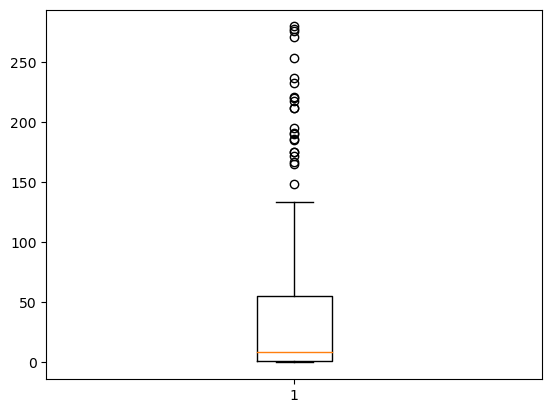

In [74]:
plt.boxplot(new_data2['wine_servings'])
plt.show();

Z-score method is useful for normal distributions.skewed distributions have asymmetry , so the z-score wouldn't accurately represent the data.